# The Spark Foundation

# name- Ritik Pathak

## Task-2

### Problem Statement

* From the given IRIS Dataset predict the optimal number of clusters and represent it visually

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the iris dataset
iris = pd.read_csv('iris.csv')

In [3]:
# show the upper and lower data of the iris dataset
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Exploratory Data Analysis
Data preparation is the process of cleaning and transforming raw data before building models.

Here we analyze the data with the following steps:

* Check dimensions of the dataframe in terms of rows and columns
* Check the data type. Refer data definition to validate the data type
* Check the distribution of variables
* Check for the outliers
* Study summary statistics
* Check for missing values
* Scale the data

In [5]:
# check the shape of the data 
iris.shape

(150, 6)

* there are 150 rows and 6 columns present in the dataset 

In [6]:
# check the data type of dataset
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

 * dataset have multiple data type

In [7]:
# drop the unwanted column
iris.drop(columns=['Id','Species'],inplace=True)

In [8]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

* All the variables have the data type as per the data definition. Thus, there is no need for type conversion

# Distribution of Variables
# Check the distribution of all the variables.

* As all the variables are numerical, we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables

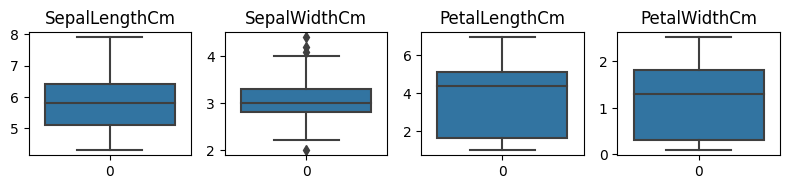

In [9]:
plt.rcParams["figure.figsize"]=(8,5)
c=1
for i in iris:
    plt.subplot(3,4,c)
    sns.boxplot(iris[i])
    c+=1
    plt.title(i)

plt.tight_layout()
plt.show()

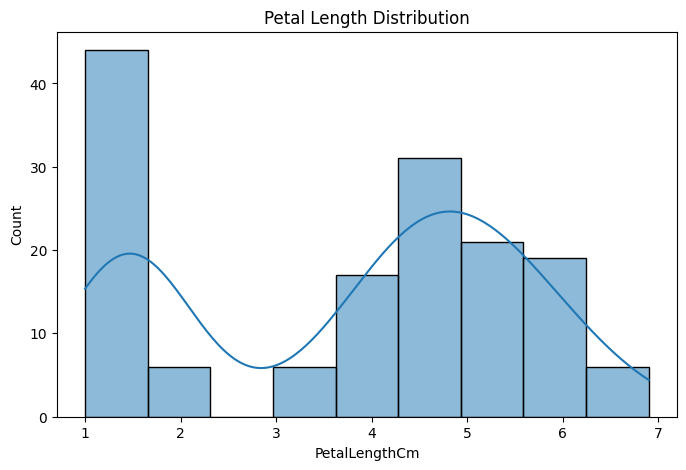

In [10]:
# Histogram
sns.histplot(data=iris, x='PetalLengthCm', kde=True)

# Set plot title
plt.title('Petal Length Distribution')

# Show the plot
plt.show()

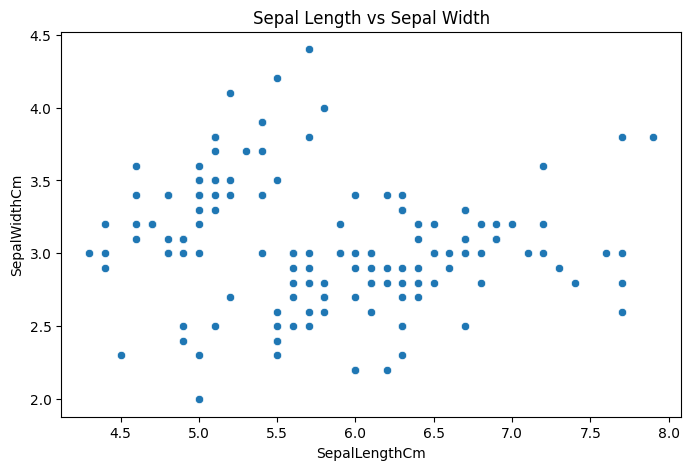

In [11]:
# Scatter plot
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)

# Set plot title
plt.title('Sepal Length vs Sepal Width')

# Show the plot
plt.show()

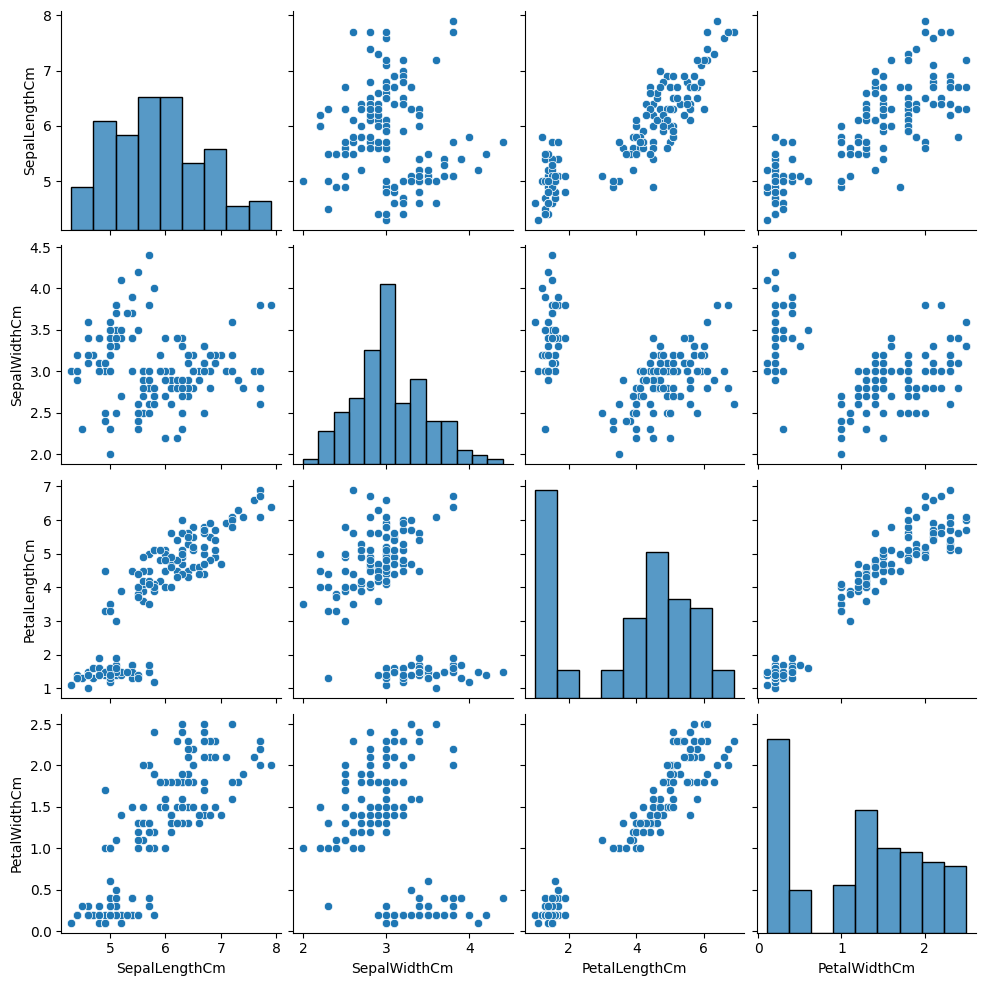

In [12]:
# Pair plot
sns.pairplot(iris)

# Show the plot
plt.show()

# Summary Statistics
* Check the statistical summary of all the variables.

In [13]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Find the missing values

In [14]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

* we can see that there is no missing valuse presant in the dataset

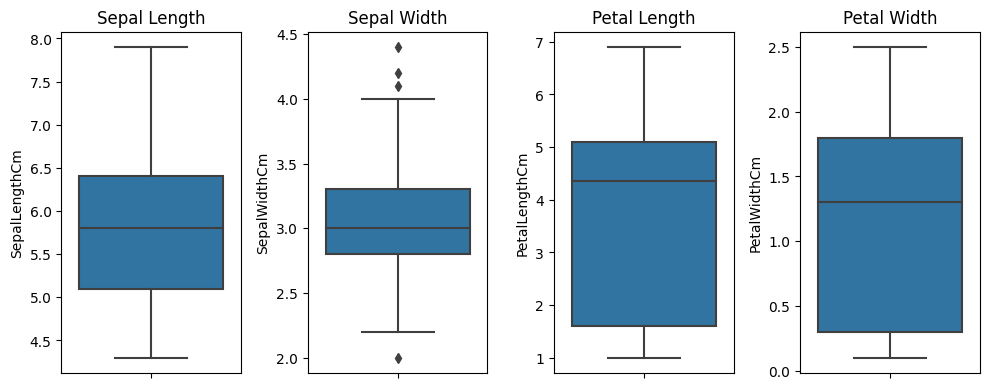

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))

# Box plot for each feature
sns.boxplot(ax=axes[0], y=iris['SepalLengthCm'])
sns.boxplot(ax=axes[1], y=iris['SepalWidthCm'])
sns.boxplot(ax=axes[2], y=iris['PetalLengthCm'])
sns.boxplot(ax=axes[3], y=iris['PetalWidthCm'])

# Set titles for each subplot
axes[0].set_title('Sepal Length')
axes[1].set_title('Sepal Width')
axes[2].set_title('Petal Length')
axes[3].set_title('Petal Width')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Outlier treatment
* Calculate the interquartile range (IQR)
* define threshold value
* identify outliers

In [16]:
# Extract the SepalWidthCm feature
sepal_width = iris['SepalWidthCm']
# Calculate the interquartile range (IQR)
Q1 = np.percentile(sepal_width, 25)
Q3 = np.percentile(sepal_width, 75)
IQR = Q3 - Q1
# Define the threshold as a multiple of IQR
threshold = 1.5  # Adjust this value as needed
lower_threshold = Q1 - threshold * IQR
upper_threshold = Q3 + threshold * IQR

# Identify outliers based on the threshold
outliers = sepal_width[(sepal_width < lower_threshold) | (sepal_width > upper_threshold)]
outliers


15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64

In [17]:
# Impute outliers with the median value of non-outliers
median_value = sepal_width.median()
sepal_width_imputed = sepal_width.copy()
sepal_width_imputed[outliers.index] = median_value

# Replace the original SepalWidthCm column with the imputed values
iris['SepalWidthCm'] = sepal_width_imputed

In [18]:
iris.describe(percentiles=[.9,.95,.96,.97,.98,.99])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.036000,3.758667,1.198667
std,0.828066,0.389851,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
50%,5.800000,3.000000,4.350000,1.300000
90%,6.900000,3.510000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000
96%,7.408000,3.800000,6.108000,2.304000
97%,7.653000,3.800000,6.353000,2.400000
98%,7.700000,3.802000,6.602000,2.402000


# feature scaling
* Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result.

* Scale the data

* Here let us use the z-score normalization (i.e. standardization) technique to scale the dataset. In the scaled data, each  variable will have a mean 0 and a standard deviation of 1

In [19]:
# creating a copy of the original dataset 
features = iris.copy()

# head() to display top five rows
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Standardize the features

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = iris.columns)
                               
# head() to display top five rows
features_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.194185,-1.341272,-1.312977
1,-1.143017,-0.092652,-1.341272,-1.312977
2,-1.385353,0.422083,-1.398138,-1.312977
3,-1.506521,0.164715,-1.284407,-1.312977
4,-1.021849,1.451553,-1.341272,-1.312977


# dendrogram

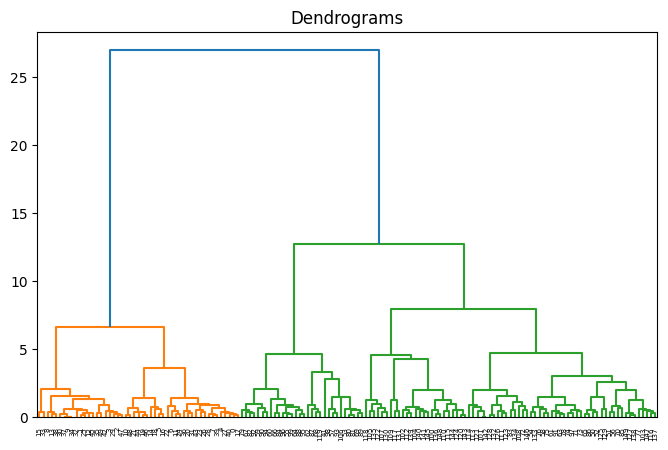

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

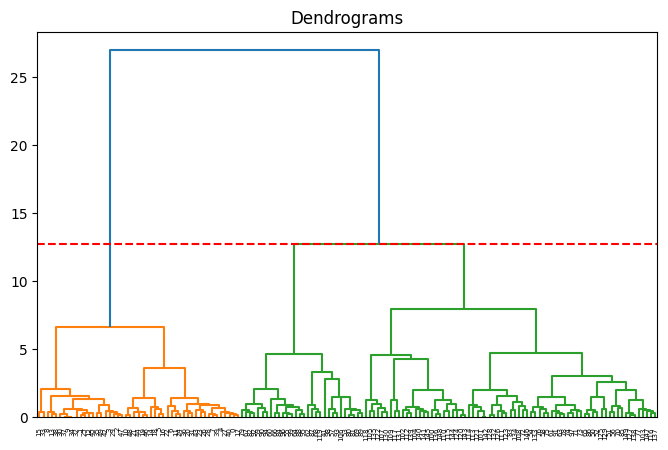

In [22]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

plt.axhline(y=12.7, color='r', linestyle='--')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cl=cluster.fit_predict(features_scaled)
cl

C:\Users\ritik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
# make a new column of clustures in dataset
iris["Cluster"]=cl

In [25]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [26]:
iris["Cluster"].value_counts()

0    71
1    49
2    30
Name: Cluster, dtype: int64

In [27]:
# make groups of clusters
cluster_group=iris.groupby(["Cluster"]).mean().T
cluster_group

Cluster,0,1,2
SepalLengthCm,6.546479,5.016327,5.530000
SepalWidthCm,2.992958,3.365306,2.600000
PetalLengthCm,5.267606,1.467347,3.930000
PetalWidthCm,1.854930,0.242857,1.206667


In [28]:
# make csv file 
cluster_group.to_csv("MyCluster.csv")

# K-means Clustering

* K-means is the most widely-used centroid-based clustering algorithm. In this method, we need to prespecify the number of clusters to the algorithm. This method tends to build more circular clusters.

In [29]:
# Apply K-means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 228.9686421348129,
 143.5630468849557,
 118.11146899338647,
 95.50565976688785,
 84.8604332001106,
 74.63318803891814,
 64.84096767631728,
 57.79325968882533,
 50.342246829966776]


# Elbow method- to find optimal number of clusters
## visualize the Elbow plot to find the optimal value of k

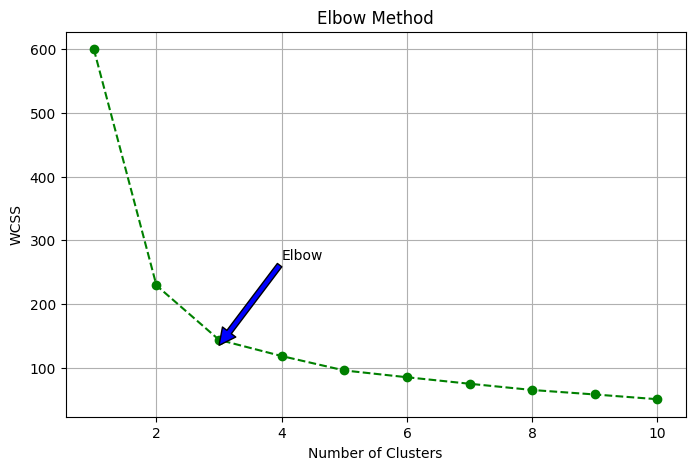

In [30]:
plt.plot(range(1,11), wcss,"go--")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.annotate("Elbow",xytext=(4,270),xy=(3,135),arrowprops={"facecolor":"blue"})
plt.grid()
plt.show()

* Based on the elbow method, the optimum number of clusters for the iris dataset is 3. 
* We can see that the WCSS values decrease rapidly as we increase the number of clusters from 1 to 3, but the rate of decrease slows down considerably as we increase the number of clusters from 3 to 4. Therefore, we might choose 3 as the optimal number of clusters based on the elbow method

# the Elbow method suggested that the optimal number of clusters might be 3, while the Silhouette method might suggest a different number. It's always a good idea to try multiple methods and compare their results to get a better sense of the optimal number of clusters.

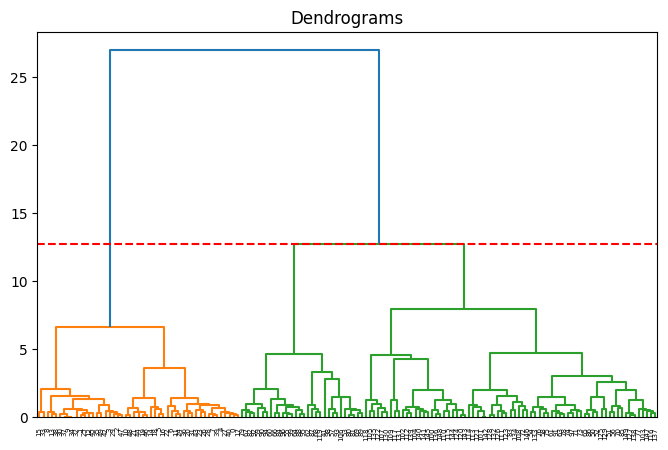

In [31]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

plt.axhline(y=12.7, color='r', linestyle='--')
plt.show()

# makeing model for cluster visualization

In [32]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(features_scaled)

C:\Users\ritik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [33]:
iris['Cluster'] = kmeans.labels_

In [34]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
# visualizing the k-means

In [36]:
# Creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(features_scaled)   

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

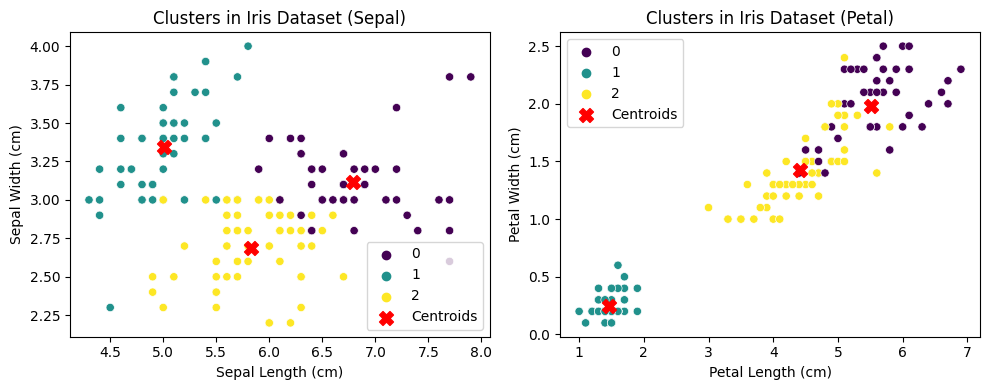

In [37]:
# Inverse transform the cluster centroids to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot for Sepal measurements with cluster centroids
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', palette='viridis')
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X', s=100, color='red', label='Centroids'
)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters in Iris Dataset (Sepal)')
plt.legend()

# Scatter plot for Petal measurements with cluster centroids
plt.subplot(1, 2, 2)
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', palette='viridis')
plt.scatter(
    centroids[:, 2], centroids[:, 3],
    marker='X', s=100, color='red', label='Centroids'
)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Clusters in Iris Dataset (Petal)')
plt.legend()

plt.tight_layout()
plt.show()